#StockX sneaker data analysis

##Initial imports and preprocessing


In [1]:
import numpy as np
import pandas as pd
from statistics import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import kagglehub
path = kagglehub.dataset_download("hudsonstuck/stockx-data-contest")
print("Path to dataset files:", path)

100%|██████████| 711k/711k [00:00<00:00, 54.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hudsonstuck/stockx-data-contest/versions/1


In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/hudsonstuck/stockx-data-contest/versions/1/StockX-Data-Contest-2019-3.csv")

In [1]:
df.head()

NameError: name 'df' is not defined

In [5]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [6]:
df.rename(index=str, columns={'Order Date': 'order_date',
                              'Brand' : 'brand',
                              'Sneaker Name' : 'sneaker_name',
                              'Sale Price' : 'sale_price',
                              'Retail Price' : 'retail_price',
                              'Release Date' : 'release_date',
                              'Shoe Size' : 'shoe_size',
                              'Buyer Region' : 'buyer_region'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    99956 non-null  object 
 1   brand         99956 non-null  object 
 2   sneaker_name  99956 non-null  object 
 3   sale_price    99956 non-null  object 
 4   retail_price  99956 non-null  object 
 5   release_date  99956 non-null  object 
 6   shoe_size     99956 non-null  float64
 7   buyer_region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.9+ MB


In [8]:
df.isnull().sum()

,0
order_date,0
brand,0
sneaker_name,0
sale_price,0
retail_price,0
release_date,0
shoe_size,0
buyer_region,0


In [9]:
df.describe()

,shoe_size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


**Metadata**:
99,956 rows and 8 columns


*No missing values*

**Variables**-
**Order Date**: datetime, Date the transaction occurred

**Brand**: string, Brand of the sneaker

**Sneaker Name**: string, Name of the sneaker

**Sale Price**: numpy float, Price paid for sneaker in transaction (resale price)

**Retail Price**: numpy int, Retail price of sneaker in stores (release price)

**Release Date**: datetime, Date the sneaker dropped

**Shoe Size**: numpy float, Shoe size (most likely in mens)

**Buyer Region**: string, transaction state (most likely for purchaser)

In [10]:
#Changing the dates(objects) to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['release_date'] = pd.to_datetime(df['release_date'])
#Removing the dollar sign
df['sale_price'] = df['sale_price'].replace('[$,]', '', regex=True).astype(float)
df['retail_price'] = df['retail_price'].replace('[$,]', '', regex=True).astype(float)

/tmp/ipython-input-699425533.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
/tmp/ipython-input-699425533.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [11]:
#Adding Features
df['order_month']=df['order_date'].dt.month_name()
df['order_year']=df['order_date'].dt.year
df['profit']=df['sale_price'] - df['retail_price']

In [12]:
#removing the hyphen from sneaker names
df['sneaker_name'] = df['sneaker_name'].apply(lambda x: x.replace('-', ' '))

In [13]:
df = df[['order_date',
         'order_month',
         'order_year',
         'release_date',
         'brand',
         'sneaker_name',
         'shoe_size',
         'sale_price',
         'retail_price',
         'profit',
         'buyer_region'
        ]]
#Reordered the date and time columns

In [14]:
#Sorting by order date
df = df.sort_values('order_date', ascending=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99956 entries, 0 to 99955
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    99956 non-null  datetime64[ns]
 1   order_month   99956 non-null  object        
 2   order_year    99956 non-null  int32         
 3   release_date  99956 non-null  datetime64[ns]
 4   brand         99956 non-null  object        
 5   sneaker_name  99956 non-null  object        
 6   shoe_size     99956 non-null  float64       
 7   sale_price    99956 non-null  float64       
 8   retail_price  99956 non-null  float64       
 9   profit        99956 non-null  float64       
 10  buyer_region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(4), int32(1), object(4)
memory usage: 8.8+ MB


In [16]:
df.head()

,order_date,order_month,order_year,release_date,brand,sneaker_name,shoe_size,sale_price,retail_price,profit,buyer_region
0,2017-09-01,September,2017,2016-09-24,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,11.0,1097.0,220.0,877.0,California
21,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,9.5,586.0,220.0,366.0,Oregon
20,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,9.0,546.0,220.0,326.0,Florida
19,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,5.5,850.0,220.0,630.0,Michigan
18,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,9.0,589.0,220.0,369.0,New York


##General statistics

In [17]:
basic_saleprice = {}

basic_saleprice["Mean"] = mean(df["sale_price"])
basic_saleprice["Median"] = median(df["sale_price"])
basic_saleprice["Standard Deviation"] = stdev(df["sale_price"])

basic_saleprice

{'Mean': 446.63471927648163,
 'Median': 370.0,
 'Standard Deviation': 255.98296885702652}

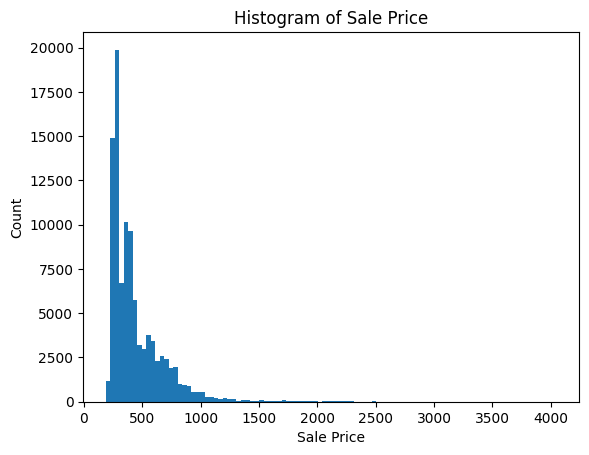

In [18]:
#Distribution of Sale Price
plt.hist(x=df["sale_price"], bins=100);

plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Histogram of Sale Price");

Clearly, the histogram is right skewed, most of the prices fall under 500 dollars


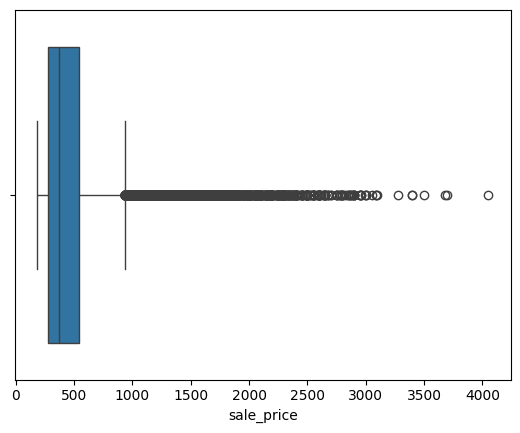

In [ ]:
sns.boxplot(x = "sale_price", data=df);

This box and whisker plot demonstrates that Sale Price has quite a few high outliers.

In [20]:
basic_retailprice = {}

basic_retailprice["Mean"] = mean(df["retail_price"])
basic_retailprice["Median"] = median(df["retail_price"])
basic_retailprice["Standard Deviation"] = stdev(df["retail_price"])

basic_retailprice

{'Mean': 208.613589979591,
 'Median': 220.0,
 'Standard Deviation': 25.200009547820848}

Next, let's take a look at Retail Price. The mean is 208.61 dollars, the median is 220.00 dollars, and the standard deviation is 25.20 dollars. The small standard deviation in Retail Price is due to manufacturers making all sneakers of a certain type cost the same regardless of colorway. For example, all Yeezys in the data retail for 220 dollars, regardless of how much they resell for on StockX.



In [21]:
basicstats_shoesize = {}

basicstats_shoesize["Mean"] = mean(df["shoe_size"])
basicstats_shoesize["Median"] = median(df["shoe_size"])
basicstats_shoesize["Mode"] = mode(df["shoe_size"])

basicstats_shoesize

{'Mean': 9.344181439833527, 'Median': 9.5, 'Mode': 10.0}

Now let's take a look at Shoe Size. Though not explicitly stated, these are most likely mens shoe sizes. Unlike Sale Price and Retail Price, Shoe Size is discrete. The mean is 9.34, the median is 9.5, and the mode is 10.

Below is a histogram of Shoe Size. The distribution looks sensible, as the middle sizes (8-12) have the highest frequencies.

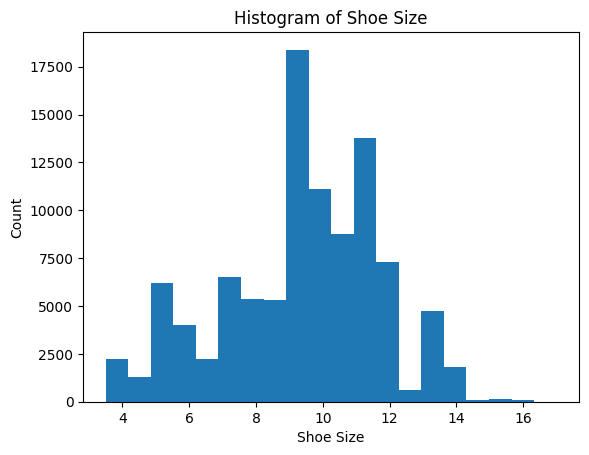

In [22]:
plt.hist(x=df["shoe_size"], bins=20);

plt.xlabel("Shoe Size")
plt.ylabel("Count")
plt.title("Histogram of Shoe Size");


This box and whisker plot shows that there are not a lot of outliers in Shoe Size.



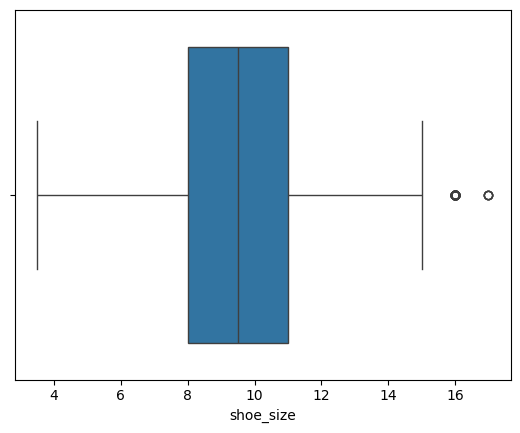

In [23]:
sns.boxplot(x = "shoe_size", data= df);

In [24]:
#Looking at the brandwise distribution of sneakers in our dataset
df["brand"].value_counts().to_frame()


,count
brand,
Yeezy,72162
Off-White,27794


In [25]:
#Looking at the top 5 most ordered sneakers
df["sneaker_name"].value_counts().to_frame().head(n=5)


,count
sneaker_name,
adidas Yeezy Boost 350 V2 Butter,11423
Adidas Yeezy Boost 350 V2 Beluga 2pt0,10395
Adidas Yeezy Boost 350 V2 Zebra,10110
Adidas Yeezy Boost 350 V2 Blue Tint,9297
Adidas Yeezy Boost 350 V2 Cream White,9097


In [26]:
#Looking at the top regions ordering these sneakers
df["buyer_region"].value_counts().to_frame().head(n=5)


,count
buyer_region,
California,19349
New York,16525
Oregon,7681
Florida,6376
Texas,5876


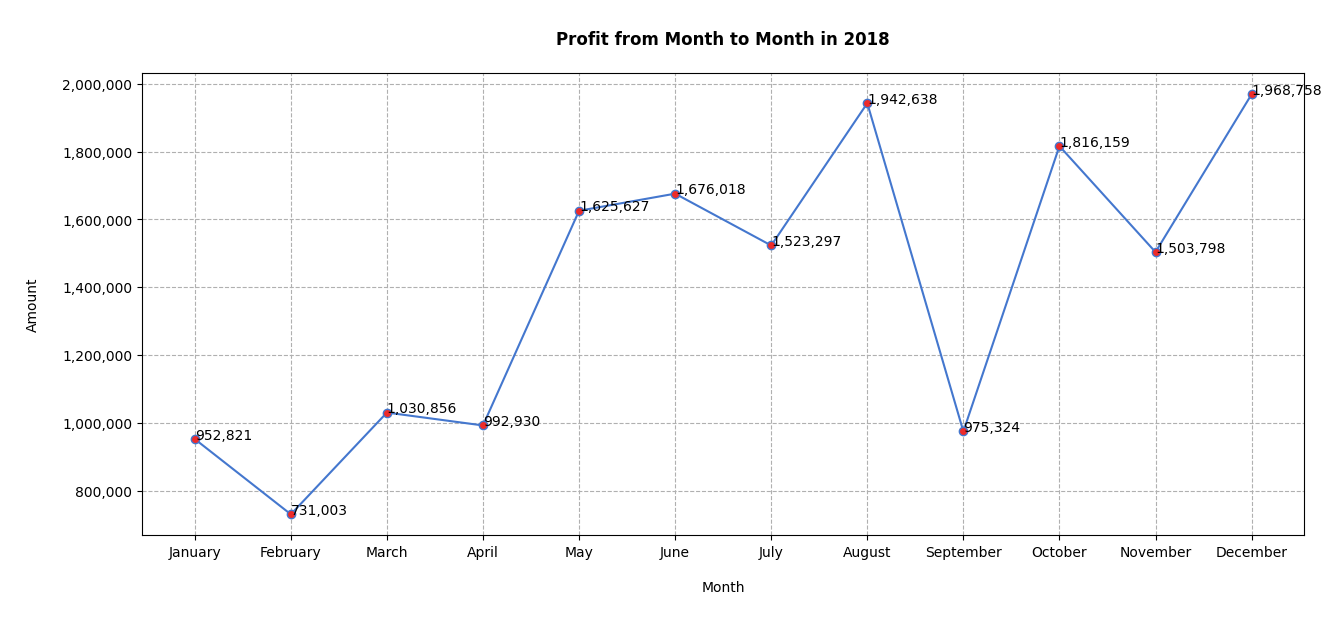

In [27]:
# Profit from month to month in 2018
profit_2018 = df[df['order_date'].dt.year == 2018]
profit_2018 = profit_2018.sort_values(['order_date','order_month'])
profit_2018 = profit_2018.groupby([profit_2018['order_date'].dt.month,'order_month'])['profit'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot('order_month', 'profit', color='#4477CE', marker='o', markerfacecolor='#ED2B2A', data=profit_2018)
plt.title(f'\nProfit from Month to Month in 2018\n', fontweight='bold')
plt.xlabel(f'\nMonth\n')
plt.ylabel(f'\nAmount\n')
plt.grid(True, linestyle='--')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for i in range(len(profit_2018)):
    plt.annotate(f"{profit_2018['profit'].iloc[i]:,.0f}", (profit_2018['order_month'].iloc[i], profit_2018['profit'].iloc[i]))

plt.show()

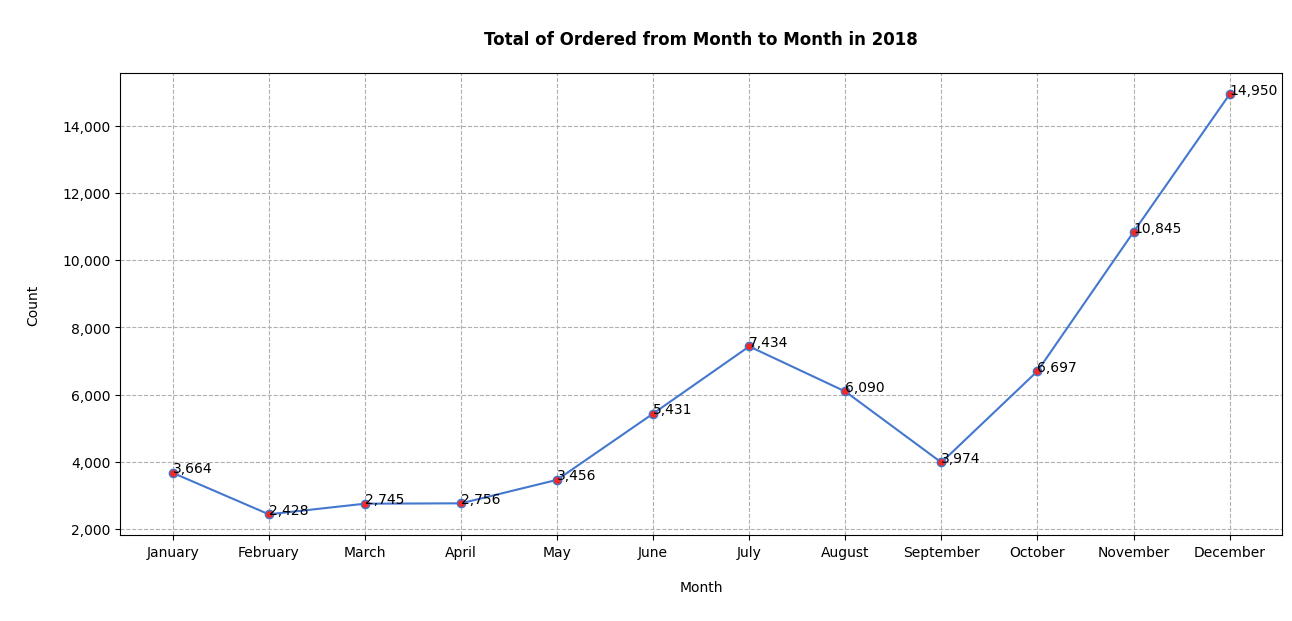

In [28]:
# Number of orders from month to month in 2018
ordercnt_2018 = df[df['order_date'].dt.year == 2018]
ordercnt_2018 = ordercnt_2018.sort_values(['order_date','order_month'])
ordercnt_2018 = ordercnt_2018.groupby([ordercnt_2018['order_date'].dt.month,'order_month']).agg({'order_date': 'count'}).rename(columns={'order_date':'count'}).reset_index()

plt.figure(figsize=(15, 6))
plt.plot('order_month', 'count', color='#4477CE', marker='o', markerfacecolor='#ED2B2A', data=ordercnt_2018)
plt.title(f'\nTotal of Ordered from Month to Month in 2018\n', fontweight='bold')
plt.xlabel(f'\nMonth\n')
plt.ylabel(f'\nCount\n')
plt.grid(True, linestyle='--')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for i in range(len(ordercnt_2018)):
    plt.annotate(f"{ordercnt_2018['count'].iloc[i]:,.0f}", (ordercnt_2018['order_month'].iloc[i], ordercnt_2018['count'].iloc[i]))

plt.show()

In [29]:
df.to_csv("processed_sneakers.csv", index=False)


In [30]:
from google.colab import files
files.download("processed_sneakers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>